In [1]:
import torch
from torch import nn

torch.__version__

'2.5.1+cu124'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Thu Feb 27 16:00:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data")
image_path = data_path/"pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} already exists ...skipping download")
else:
    print(f"{image_path} does not exists creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path/ "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("downloading pizza, steak, sushi data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
        print("unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exists creating one...
downloading pizza, steak, sushi data...
unzipping pizza, steak, sushi data...


In [5]:
import os
def walk_through_dir(dir_path):
    """ walks through directories """
    for dir_path, dir_names, file_names in os.walk(dir_path):
        print(f"there are {len(dir_names)} derectories and {len(file_names)} files in {dir_path}")

In [6]:
walk_through_dir(data_path)

there are 1 derectories and 1 files in data
there are 2 derectories and 0 files in data/pizza_steak_sushi
there are 3 derectories and 0 files in data/pizza_steak_sushi/test
there are 0 derectories and 25 files in data/pizza_steak_sushi/test/pizza
there are 0 derectories and 19 files in data/pizza_steak_sushi/test/steak
there are 0 derectories and 31 files in data/pizza_steak_sushi/test/sushi
there are 3 derectories and 0 files in data/pizza_steak_sushi/train
there are 0 derectories and 78 files in data/pizza_steak_sushi/train/pizza
there are 0 derectories and 75 files in data/pizza_steak_sushi/train/steak
there are 0 derectories and 72 files in data/pizza_steak_sushi/train/sushi


In [7]:
train_dir = image_path/ "train"
test_dir = image_path/ "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

image class: sushi
random image path: data/pizza_steak_sushi/train/sushi/169392.jpg
image height 512
image width 384


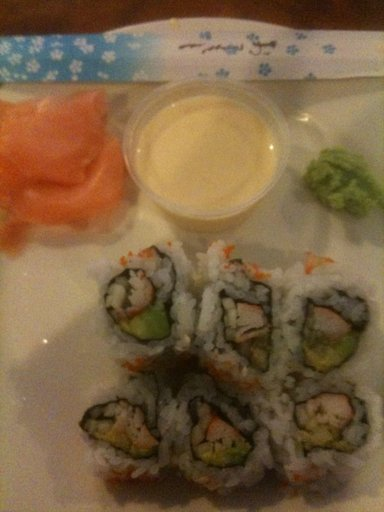

In [8]:
import random
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"image class: {image_class}")
print(f"random image path: {random_image_path}")
print(f"image height {img.height}")
print(f"image width {img.width}")
img

array([[[ 77,  42,  12],
        [ 78,  43,  13],
        [ 72,  37,   7],
        ...,
        [ 52,  33,  16],
        [ 49,  30,  13],
        [ 46,  27,  10]],

       [[ 72,  37,   7],
        [ 74,  39,   9],
        [ 70,  35,   5],
        ...,
        [ 51,  32,  15],
        [ 48,  29,  12],
        [ 45,  26,   9]],

       [[ 74,  37,  10],
        [ 77,  40,  13],
        [ 73,  36,   9],
        ...,
        [ 51,  32,  15],
        [ 50,  31,  14],
        [ 50,  31,  14]],

       ...,

       [[146, 124,  83],
        [148, 126,  85],
        [149, 127,  88],
        ...,
        [166, 137,  95],
        [165, 136,  94],
        [168, 139,  97]],

       [[145, 122,  90],
        [147, 124,  92],
        [145, 122,  91],
        ...,
        [169, 140,  96],
        [169, 140,  98],
        [168, 139,  97]],

       [[143, 119,  91],
        [143, 119,  91],
        [141, 117,  91],
        ...,
        [171, 142,  98],
        [169, 140,  98],
        [166, 137,  95]]], dtype=uint8)
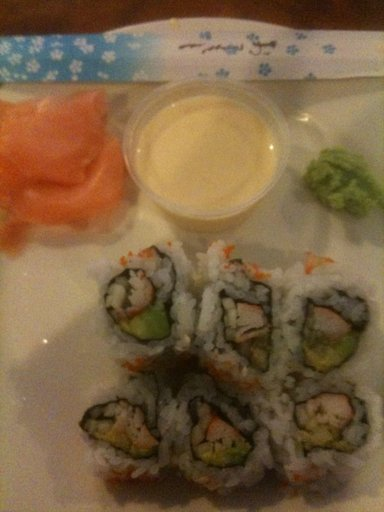

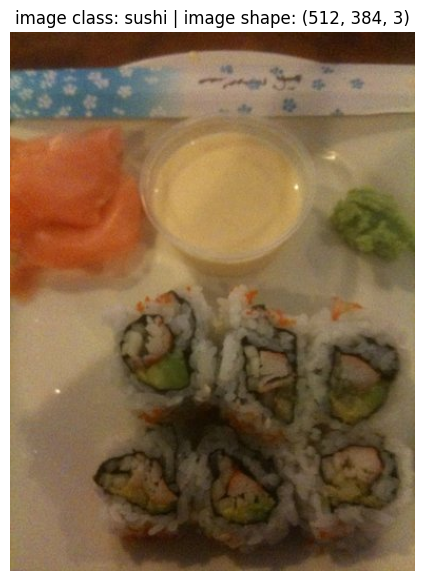

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class} | image shape: {img_as_array.shape}")
plt.axis(False)

img_as_array

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

data_transform(img)

tensor([[[0.2039, 0.2118, 0.2000,  ..., 0.2902, 0.2902, 0.3020],
         [0.2235, 0.2196, 0.2078,  ..., 0.2902, 0.2902, 0.3059],
         [0.2510, 0.2471, 0.2431,  ..., 0.2902, 0.2941, 0.2941],
         ...,
         [0.6196, 0.5647, 0.5412,  ..., 0.5882, 0.5882, 0.5961],
         [0.6510, 0.6235, 0.6157,  ..., 0.5922, 0.5882, 0.5843],
         [0.6627, 0.6510, 0.6431,  ..., 0.5882, 0.5804, 0.5804]],

        [[0.1216, 0.1216, 0.1098,  ..., 0.1569, 0.1569, 0.1529],
         [0.1216, 0.1216, 0.1176,  ..., 0.1529, 0.1529, 0.1569],
         [0.1412, 0.1412, 0.1412,  ..., 0.1529, 0.1529, 0.1490],
         ...,
         [0.5294, 0.4824, 0.4588,  ..., 0.4941, 0.5059, 0.5020],
         [0.5490, 0.5294, 0.5255,  ..., 0.4824, 0.4902, 0.4980],
         [0.5490, 0.5451, 0.5373,  ..., 0.4784, 0.4824, 0.4941]],

        [[0.0510, 0.0549, 0.0431,  ..., 0.0627, 0.0510, 0.0471],
         [0.0510, 0.0471, 0.0392,  ..., 0.0627, 0.0510, 0.0431],
         [0.0667, 0.0667, 0.0549,  ..., 0.0510, 0.0588, 0.

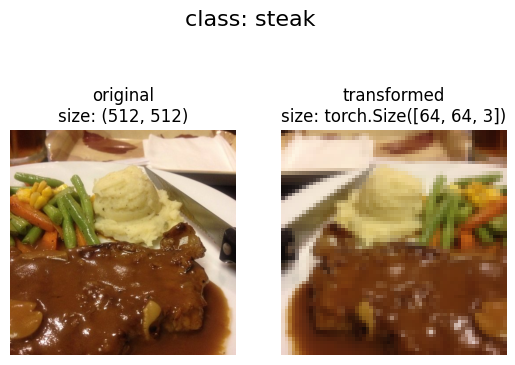

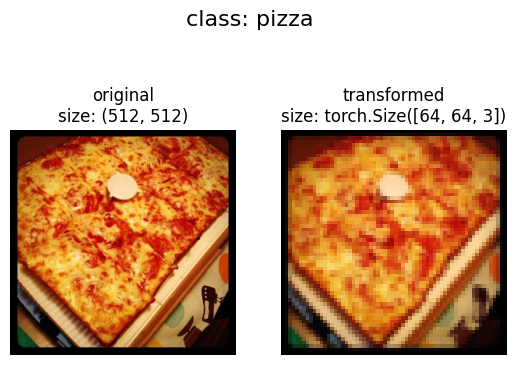

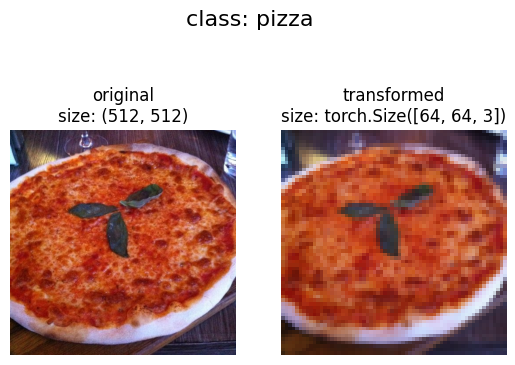

In [12]:
def plot_transformed_image(image_paths: list, transform, n=3,seed=2):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"original\nsize: {f.size}")
            ax[0].axis(False)

            transformed_img = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"transformed\nsize: {transformed_img.shape}")
            ax[1].axis("off")

            fig.suptitle(f"class: {image_path.parent.stem}", fontsize=16)

plot_transformed_image(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=None)



In [13]:
from torchvision import datasets

train_data = datasets.ImageFolder(root= train_dir,
                                  transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [15]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [17]:
img, lable = train_data[0][0], train_data[0][1]
print(f"image tensor: {img}")
print(f"lable: {lable}")
print(f"image shape: {img.shape}")

image tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

In [18]:
img_permute = img.permute(1,2,0)
print(f"original shape: {img.shape}")
print(f"permuteted image: {img_permute.shape}")

original shape: torch.Size([3, 64, 64])
permuteted image: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

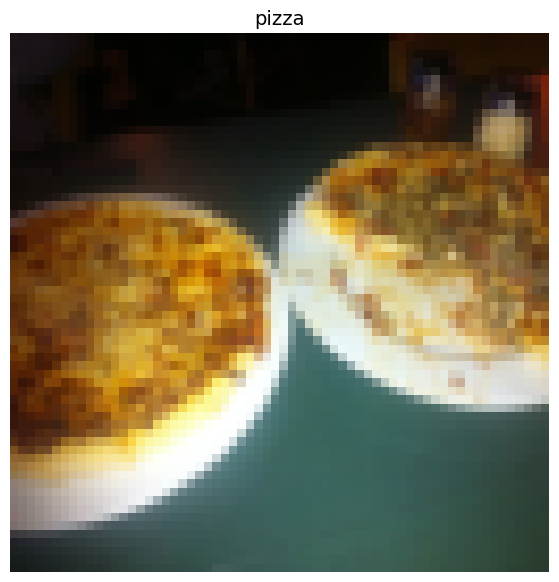

In [19]:
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[lable], fontsize=14)

In [20]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=True)

len(train_dataloader), len(test_dataloader)

(225, 75)

In [21]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [22]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [23]:
target_directory = train_dir
print(f"target directory: {target_directory}")

class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

target directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [24]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in list(os.scandir(directory)) if entry.is_dir())

    if not classes:
        raise FileNotFoundError(f"couldn't find any classes in {directory}... please check file structure.")

    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

    return classes, class_to_idx

In [25]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [26]:
from typing import Tuple, Dict, List

class ImageFolderCustom(Dataset):
    def __init__(self,
                 targ_directory: str,
                 transform =None):
        self.paths = list(pathlib.Path(targ_directory).glob("*/*.jpg"))

        self.transform = transform

        self.classes, self.class_to_idx = find_classes(targ_directory)

    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)

        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else :
            return img, class_idx

In [27]:
from torchvision import transforms

train_transform_custom = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])

test_transfom_custom = train_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])

In [28]:
train_data_custom = ImageFolderCustom(targ_directory=train_dir,
                                      transform=train_transform_custom)

test_data_custom = ImageFolderCustom(targ_directory=test_dir,
                                     transform=test_transfom_custom)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7e7227dd7710>,
 <__main__.ImageFolderCustom at 0x7e7227ddda10>)

In [29]:
print(len(train_data_custom))

print(train_data_custom.classes)

print(train_data_custom.class_to_idx)

225
['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


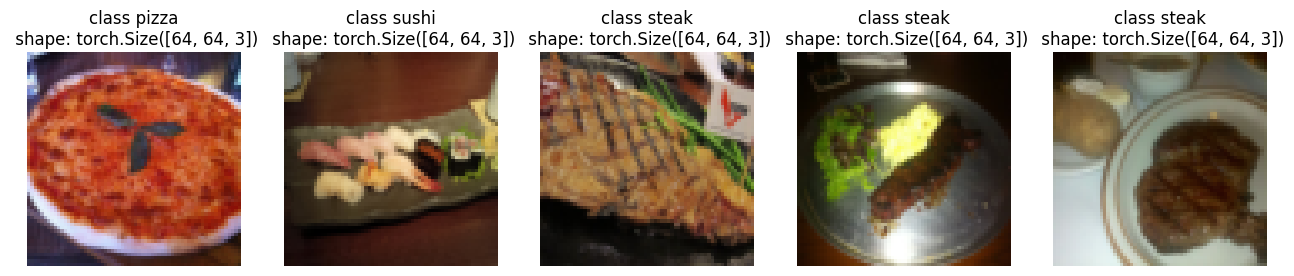

In [30]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    if n>10:
        n =10

    if n>5:
        display_shape = False

    if seed:
        random.seed(seed)

    random_example_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16,8))

    for i, targ_sample in enumerate(random_example_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_image_adjust = targ_image.permute(1,2,0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class {classes[targ_label]}"
            if display_shape:
                title = title + f"\n shape: {targ_image_adjust.shape}"
        plt.title(title)


display_random_images(train_data,
                      n=5,
                      classes=class_names)

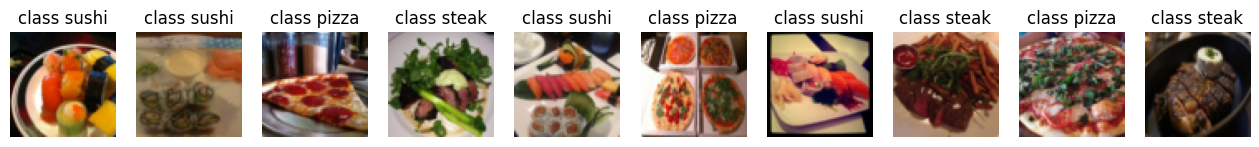

In [31]:
display_random_images(train_data_custom,
                      n=16,
                      classes=class_names)

In [32]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

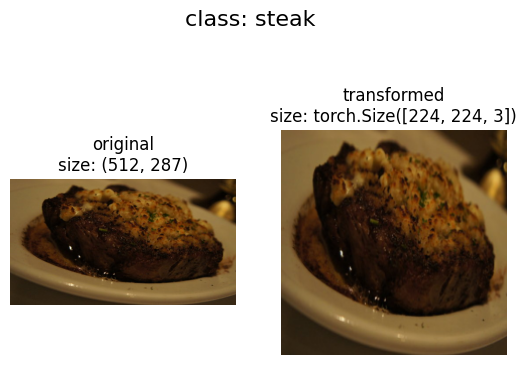

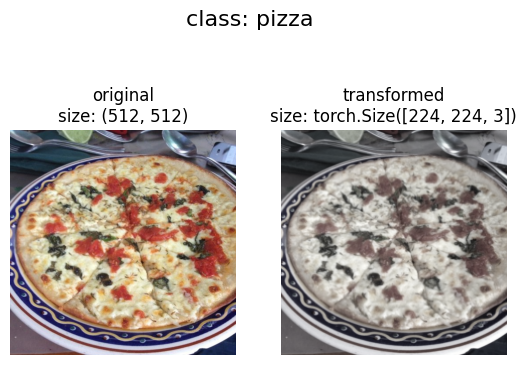

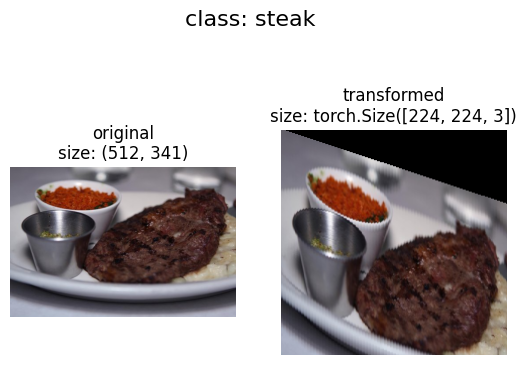

In [33]:
image_path_list

plot_transformed_image(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

In [34]:
from torchvision import transforms

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [35]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

In [36]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int,
                 hidden_unit: int,
                 output_shape: int,
                 ) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
                            nn.Conv2d(input_shape,
                                        hidden_unit,
                                        kernel_size=3,
                                        stride=1,
                                        padding=0),
                            nn.ReLU(),
                            nn.Conv2d(hidden_unit,
                                        hidden_unit,
                                        kernel_size=3,
                                        stride=1,
                                        padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2,
                                         stride=2))

        self.conv_block_2 = nn.Sequential(
                            nn.Conv2d(hidden_unit,
                                        hidden_unit,
                                        kernel_size=3,
                                        stride=1,
                                        padding=0),
                            nn.ReLU(),
                            nn.Conv2d(hidden_unit,
                                        hidden_unit,
                                        kernel_size=3,
                                        stride=1,
                                        padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2,
                                         stride=2))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_unit*13*13,
                      output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [37]:
model_0 = TinyVGG(input_shape=3,
                  hidden_unit=10,
                  output_shape=len(class_names)).to(device)

In [38]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [39]:
model_0(image_batch.to(device))

tensor([[ 0.0224, -0.0077,  0.0537],
        [ 0.0223, -0.0050,  0.0527],
        [ 0.0279, -0.0033,  0.0514],
        [ 0.0223, -0.0051,  0.0469],
        [ 0.0223, -0.0044,  0.0547],
        [ 0.0208, -0.0062,  0.0561],
        [ 0.0207, -0.0058,  0.0516],
        [ 0.0212, -0.0041,  0.0567],
        [ 0.0264, -0.0054,  0.0463],
        [ 0.0246, -0.0056,  0.0533],
        [ 0.0225, -0.0065,  0.0522],
        [ 0.0278, -0.0039,  0.0498],
        [ 0.0268, -0.0041,  0.0522],
        [ 0.0232, -0.0007,  0.0527],
        [ 0.0232, -0.0083,  0.0487],
        [ 0.0210, -0.0074,  0.0523],
        [ 0.0221, -0.0061,  0.0529],
        [ 0.0232, -0.0105,  0.0561],
        [ 0.0239, -0.0092,  0.0565],
        [ 0.0244, -0.0085,  0.0545],
        [ 0.0237, -0.0090,  0.0497],
        [ 0.0273, -0.0004,  0.0478],
        [ 0.0178, -0.0050,  0.0581],
        [ 0.0244, -0.0066,  0.0576],
        [ 0.0176, -0.0043,  0.0541],
        [ 0.0262, -0.0027,  0.0439],
        [ 0.0232, -0.0039,  0.0519],
 

In [40]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [41]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X,y) in enumerate(dataloader):

        X,y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred_class)

    train_loss = train_loss/ len(dataloader)
    train_acc = train_acc/ len(dataloader)
    return train_loss, train_acc

In [42]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            X,y = X.to(device), y.to(device)

            test_pred_logit = model(X)

            loss = loss_fn(test_pred_logit, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logit.argmax(dim=1)

            test_acc += (test_pred_labels==y).sum().item()/len(test_pred_labels)

    test_loss = test_loss/ len(dataloader)
    test_acc = test_acc/ len(dataloader)

    return test_loss, test_acc

In [43]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

    results = {"train_loss" : [],
               "train_acc" : [],
               "test_loss" : [],
               "test_acc": []}
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")


        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)

    return results

In [44]:
torch.manual_seed(42)

num_epochs = 20

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer

start_timer = timer()

model_o_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        epochs=num_epochs)

end_timer = timer()

print(f"total training time: {end_timer-start_timer:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

epoch: 0 | train loss: 1.1089 | train acc: 0.3244 | test loss: 1.0975 | test acc: 0.4133
epoch: 1 | train loss: 1.0991 | train acc: 0.3289 | test loss: 1.0980 | test acc: 0.3333
epoch: 2 | train loss: 1.0991 | train acc: 0.3467 | test loss: 1.0989 | test acc: 0.3333
epoch: 3 | train loss: 1.0991 | train acc: 0.3333 | test loss: 1.0995 | test acc: 0.3333
epoch: 4 | train loss: 1.0990 | train acc: 0.3467 | test loss: 1.0999 | test acc: 0.3333
epoch: 5 | train loss: 1.0989 | train acc: 0.3467 | test loss: 1.0996 | test acc: 0.3333
epoch: 6 | train loss: 1.1176 | train acc: 0.3067 | test loss: 1.0845 | test acc: 0.4133
epoch: 7 | train loss: 1.1023 | train acc: 0.3067 | test loss: 1.0998 | test acc: 0.3333
epoch: 8 | train loss: 1.0992 | train acc: 0.3467 | test loss: 1.1012 | test acc: 0.3333
epoch: 9 | train loss: 1.0989 | train acc: 0.3467 | test loss: 1.1015 | test acc: 0.3333
epoch: 10 | train loss: 1.0987 | train acc: 0.3467 | test loss: 1.1015 | test acc: 0.3333
epoch: 11 | train lo

In [45]:
model_o_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [46]:
train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()])
test_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                             transforms.ToTensor()])


In [47]:
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_augmented = datasets.ImageFolder(root=test_dir,
                                           transform=test_transform_trivial)

In [48]:
import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS= os.cpu_count()

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_augmented = DataLoader(dataset=test_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,
                                       num_workers=NUM_WORKERS)



In [49]:
model_1 = TinyVGG(input_shape=3,
                  hidden_unit=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [50]:
torch.manual_seed(42)

num_epochs = 5

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

start_timer = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_augmented,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        epochs=num_epochs,
                        device=device)
end_timer= timer()

print(f"total time for model to run: {end_timer-start_timer:.3f} seconds")



  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0 | train loss: 1.1049 | train acc: 0.2500 | test loss: 1.1017 | test acc: 0.2604
epoch: 1 | train loss: 1.0792 | train acc: 0.4258 | test loss: 1.1066 | test acc: 0.3400
epoch: 2 | train loss: 1.1276 | train acc: 0.3047 | test loss: 1.1021 | test acc: 0.3598
epoch: 3 | train loss: 1.0822 | train acc: 0.4258 | test loss: 1.0923 | test acc: 0.3598
epoch: 4 | train loss: 1.1020 | train acc: 0.3047 | test loss: 1.0917 | test acc: 0.3400
total time for model to run: 9.397 seconds


In [51]:
model_1_results

{'train_loss': [1.1049137264490128,
  1.0792459174990654,
  1.12762089073658,
  1.082174390554428,
  1.1020063608884811],
 'train_acc': [0.25, 0.42578125, 0.3046875, 0.42578125, 0.3046875],
 'test_loss': [1.1016945044199626,
  1.1066155831019084,
  1.1020833253860474,
  1.092291037241618,
  1.091672698656718],
 'test_acc': [0.2604166666666667,
  0.33996212121212127,
  0.35984848484848486,
  0.35984848484848486,
  0.33996212121212127]}

In [52]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

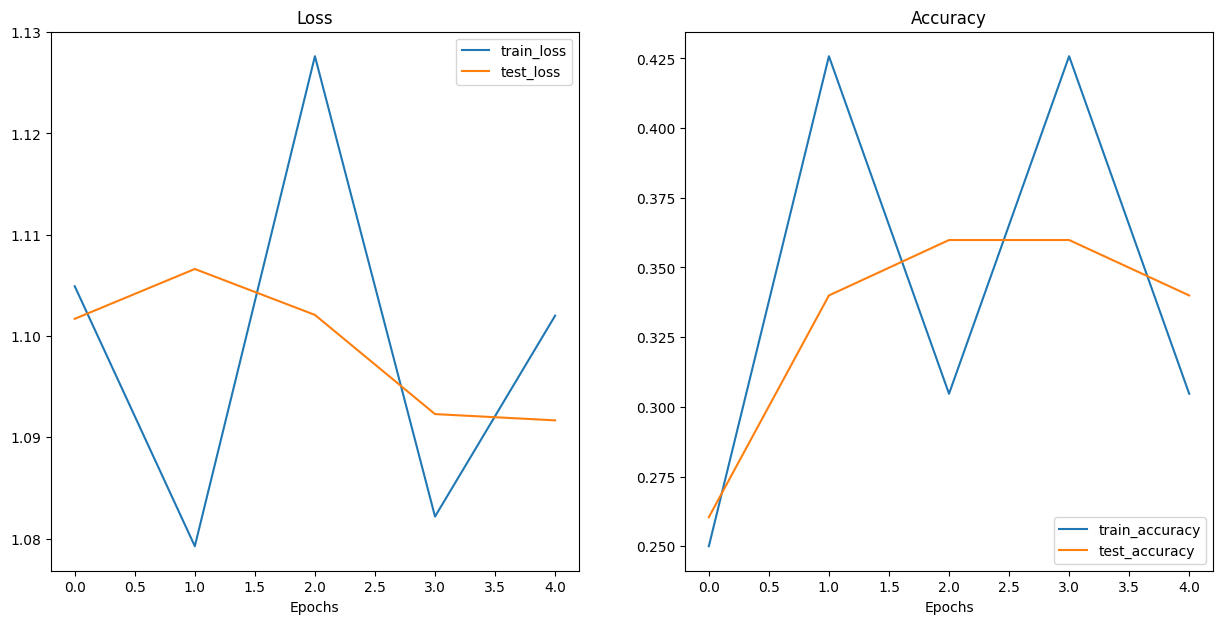

In [53]:
plot_loss_curves(model_1_results)

In [54]:
import requests

custom_image_path = data_path/ "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"downloadein {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists skip downloading...")


downloadein data/04-pizza-dad.jpeg...


In [55]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image_uint8

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [56]:
custom_image_transform = transforms.Compose([transforms.Resize(size=(64,64))])
custom_image_transformed = custom_image_transform(custom_image_uint8).unsqueeze(0)
custom_image_transformed.shape

torch.Size([1, 3, 64, 64])

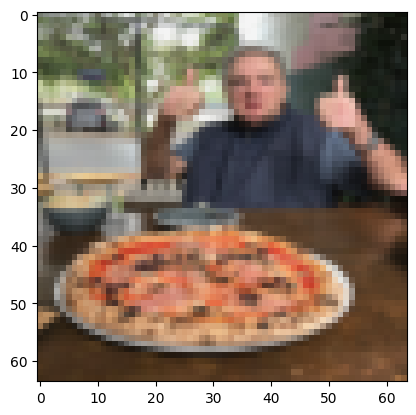

In [63]:
plt.imshow(custom_image_transformed.squeeze(dim=0).permute(1,2,0))

In [64]:

model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))
custom_image_pred

tensor([[ 0.0858, -0.0988, -0.1087]], device='cuda:0')

In [65]:
class_names

['pizza', 'steak', 'sushi']

In [67]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_labels = torch.argmax(custom_image_pred_probs).cpu()
custom_image_pred_labels

tensor(0)

In [69]:
def pred_plot_image(model: torch.nn.Module,
                    image_path: str,
                    class_names:List[str] = None,
                    transform = None,
                    device=device):
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)/255

    if transform:
        target_image = transform(target_image)
    model.to(device)

    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)

    target_image_pred = model(target_image.to(device))

    target_image_lables = torch.argmax(torch.softmax(target_image_pred, dim=1), dim=1)

    plt.imshow(target_image.squeeze().permute(1,2,0))

    if class_names:
        title = f"pred: {class_names[target_image_lables.cpu()]}"
    else:
        title = f"pred: {target_image_pred}"
    plt.title(title)
    plt.axis("off")

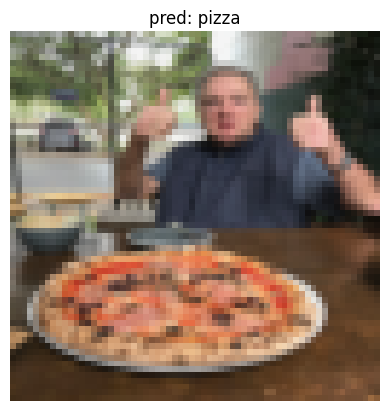

In [72]:
pred_plot_image(model=model_0,
                image_path=custom_image_path,
                class_names=class_names,
                transform=custom_image_transform,
                device=device)